In [9]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM, SimpleRNN, Dropout
from keras.callbacks import LambdaCallback

import wandb
from wandb.keras import WandbCallback

import plotutil
from plotutil import PlotCallback

import matplotlib.pyplot as plt
%matplotlib inline

wandb.init()
config = wandb.config

config.repeated_predictions = True
config.look_back = 128

W&B Run: https://app.wandb.ai/mlclass/timeseries-nov1/runs/mtdh9gxe
Call `%%wandb` in the cell containing your training loop to display live results.


In [2]:
def load_data(data_type="airline"):
    if data_type == "flu":
        df = pd.read_csv('flusearches.csv')
        data = df.flu.astype('float32').values
    elif data_type == "airline":
        df = pd.read_csv('international-airline-passengers.csv')
        data = df.passengers.astype('float32').values
    elif data_type == "sin":
        df = pd.read_csv('sin.csv')
        data = df.sin.astype('float32').values
    return data

In [34]:
# convert an array of values into a dataset matrix
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-config.look_back-1):
        a = dataset[i:(i+config.look_back)]
        dataX.append(a)
        dataY.append(dataset[i + config.look_back])
    return np.array(dataX), np.array(dataY)

data = load_data("sin")

In [35]:
# normalize data to between 0 and 1
max_val = max(data)
min_val = min(data)
data=(data-min_val)/(max_val-min_val)

In [36]:
# split into train and test sets
split = int(len(data) * 0.70)
train = data[:split]
test = data[split:]

trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

trainX = trainX[:, :, np.newaxis]
testX = testX[:, :, np.newaxis]

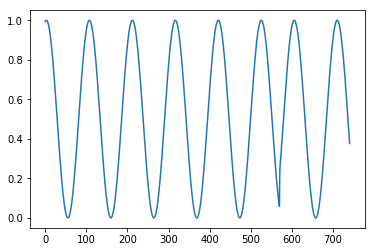

In [37]:
plt.plot(np.append(trainY, testY))

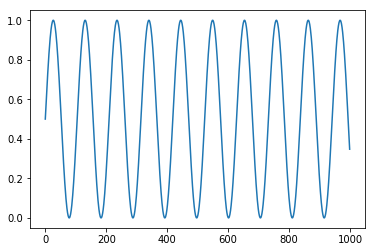

In [38]:
plt.plot(np.append(train, test))

In [ ]:
plt.scatter(x = np.arange(0,len(np.append(trainY, testY))), 
            y = np.append(trainY, testY))